# Análise Comparativa de Modelos de Machine Learning
## Classificação de Depressão em Estudantes

### Objetivo do Projeto
Este projeto implementa e compara três diferentes algoritmos de machine learning para classificação binária de depressão em estudantes:
- **Support Vector Machine (SVM)**
- **Árvore de Decisão**
- **Redes Neurais**

### Metodologia
- Dataset balanceado (50% / 50%)
- Divisão treino/teste: 80% / 20%
- Validação cruzada para otimização de hiperparâmetros
- Métricas: Accuracy, Precision, Recall, F1-Score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Resultados dos Modelos

### Consolidação dos Resultados Obtidos
Os resultados abaixo foram coletados dos notebooks individuais de cada modelo:

In [2]:
svm_results = {
    'Modelo': 'SVM',
    'Accuracy': 0.83,
    'Precision_0': 0.84, 
    'Recall_0': 0.81,
    'F1_Score_0': 0.82,
    'Precision_1': 0.81,
    'Recall_1': 0.84,
    'F1_Score_1': 0.83,
    'Ein': 0.1689,  
    'Eout': 0.1749 
}

arvore_results = {
    'Modelo': 'Árvore de Decisão',
    'Accuracy': 0.82,
    'Precision_0': 0.81,
    'Recall_0': 0.82,
    'F1_Score_0': 0.82,
    'Precision_1': 0.83,
    'Recall_1': 0.81,
    'F1_Score_1': 0.82,
    'Ein': 0.1790,  
    'Eout': 0.1824 
}

redes_results = {
    'Modelo': 'Redes Neurais',
    'Accuracy': 0.83, 
    'Precision_0': 0.82,
    'Recall_0': 0.84,
    'F1_Score_0': 0.83,
    'Precision_1': 0.83,
    'Recall_1': 0.82,
    'F1_Score_1': 0.82,
    'Ein': 0.1787,
    'Eout': 0.1669
}

results_df = pd.DataFrame([svm_results, arvore_results, redes_results])
print("=== RESULTADOS CONSOLIDADOS ===")
print(results_df[['Modelo', 'Accuracy', 'F1_Score_0', 'F1_Score_1','Recall_0', 'Recall_1']])

=== RESULTADOS CONSOLIDADOS ===
              Modelo  Accuracy  F1_Score_0  F1_Score_1  Recall_0  Recall_1
0                SVM      0.83        0.82        0.83      0.81      0.84
1  Árvore de Decisão      0.82        0.82        0.82      0.82      0.81
2      Redes Neurais      0.83        0.83        0.82      0.84      0.82


## 2. Análise Comparativa Visual

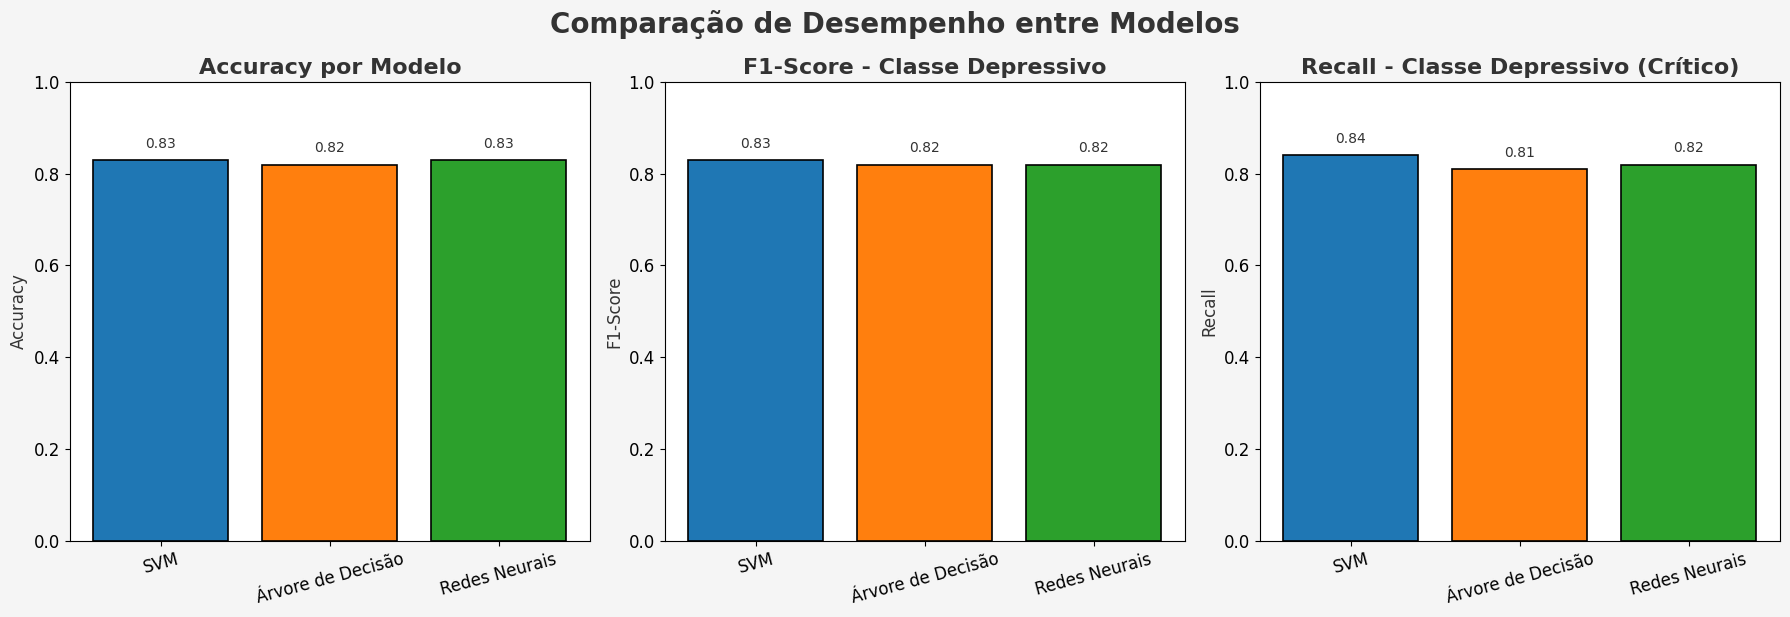

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor='#F5F5F5')

# Paleta de cores personalizada
colors = ['#1F77B4', '#FF7F0E', '#2CA02C']

# Accuracy
models = results_df['Modelo']
accuracy = results_df['Accuracy']
axes[0].bar(models, accuracy, color=colors, edgecolor='black', linewidth=1.2)
axes[0].set_title('Accuracy por Modelo', fontsize=16, fontweight='bold', color='#333333')
axes[0].set_ylabel('Accuracy', fontsize=12, color='#333333')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', labelsize=12, rotation=15)
axes[0].tick_params(axis='y', labelsize=12)
for i, v in enumerate(accuracy):
    axes[0].text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='#333333')

# F1-Score Classe Depressivo (Classe 1)
f1_depressivo = results_df['F1_Score_1']
axes[1].bar(models, f1_depressivo, color=colors, edgecolor='black', linewidth=1.2)
axes[1].set_title('F1-Score - Classe Depressivo', fontsize=16, fontweight='bold', color='#333333')
axes[1].set_ylabel('F1-Score', fontsize=12, color='#333333')
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', labelsize=12, rotation=15)
axes[1].tick_params(axis='y', labelsize=12)
for i, v in enumerate(f1_depressivo):
    axes[1].text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='#333333')

# Recall Classe Depressivo (Importante em saúde mental)
recall_depressivo = results_df['Recall_1']
axes[2].bar(models, recall_depressivo, color=colors, edgecolor='black', linewidth=1.2)
axes[2].set_title('Recall - Classe Depressivo (Crítico)', fontsize=16, fontweight='bold', color='#333333')
axes[2].set_ylabel('Recall', fontsize=12, color='#333333')
axes[2].set_ylim(0, 1)
axes[2].tick_params(axis='x', labelsize=12, rotation=15)
axes[2].tick_params(axis='y', labelsize=12)
for i, v in enumerate(recall_depressivo):
    axes[2].text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=10, color='#333333')

# Ajustes gerais
plt.tight_layout()
plt.suptitle('Comparação de Desempenho entre Modelos', fontsize=20, fontweight='bold', color='#333333', y=1.02)
plt.subplots_adjust(top=0.9)
plt.show()